# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification


### Transfer learning

In the previous notebook, I trained my own CNN and got a certain performance. Let's see how hard it is to match that performance with transfer learning.

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 0: Setting up

The following cells make sure that the environment is setup correctly and check that your GPU is available and ready to go. You have to execute them every time you restart your notebook.

In [5]:
# Install requirements
!pip install -r requirements.txt | grep -v "already satisfied"

  Using cached opencv_python_headless-4.5.3.56-cp39-cp39-manylinux2014_x86_64.whl (37.1 MB)
  Using cached matplotlib-3.4.3-cp39-cp39-manylinux1_x86_64.whl (10.3 MB)
  Using cached numpy-1.21.2-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.8 MB)
  Using cached Pillow-7.0.0-cp39-cp39-linux_x86_64.whl
  Using cached bokeh-2.1.1-py3-none-any.whl
  Using cached torch-1.9.0-cp39-cp39-manylinux1_x86_64.whl (831.4 MB)
  Using cached torchvision-0.10.0-cp39-cp39-manylinux1_x86_64.whl (22.1 MB)
  Using cached ipywidgets-7.6.5-py2.py3-none-any.whl (121 kB)
  Using cached livelossplot-0.5.4-py3-none-any.whl (22 kB)
  Using cached pytest-7.1.1-py3-none-any.whl (297 kB)
  Using cached pandas-1.3.5-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.5 MB)
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached jupyterlab_widgets-3.0.8-py3-none-any.whl (214 kB)
  Using cached widgetsnbextension-3.5.2-py2.py3-none-any.whl (1.6 MB)
  Using cached nbformat-5.9.2-py

In [6]:
from src.helpers import setup_env

# If running locally, this will download dataset (make sure you have at 
# least 2 Gb of space on your hard drive)
setup_env()

GPU available
Dataset already downloaded. If you need to re-download, please delete the directory landmark_images
Reusing cached mean and std


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 1: Create transfer learning architecture

In [7]:
!pytest -vv src/transfer.py

============================= test session starts ==============================
platform linux -- Python 3.9.16, pytest-7.1.1, pluggy-1.0.0 -- /opt/conda/bin/python3.9
cachedir: .pytest_cache
rootdir: /root
plugins: anyio-3.7.1
collected 1 item                                                               

src/transfer.py::test_get_model_transfer_learning PASSED                 [100%]

=============================== warnings summary ===============================
src/transfer.py::test_get_model_transfer_learning
  /opt/conda/lib/python3.9/site-packages/jupyter_client/connect.py:20: DeprecationWarning: Jupyter is migrating its paths to use standard platformdirs
  given by the platformdirs library.  To remove this warning and
  see the appropriate new directories, set the environment variable
  `JUPYTER_PLATFORM_DIRS=1` and then run `jupyter --paths`.
  The use of platformdirs will be the default in `jupyter_core` v6
    from jupyter_core.paths import jupyter_data_dir, jupyter_runtim

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 2: Train, validation and test

Let's train the transfer learning model! I'll define the hyperparameters:

In [12]:
batch_size = 64  # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2  # fraction of the training data to reserve for validation
num_epochs = 15  # number of epochs for training
num_classes = 50  # number of classes. Do not change this
learning_rate = 0.001  # Learning rate for SGD (or Adam)
opt = 'adam'      # optimizer. 'sgd' or 'adam'
weight_decay = 0.0 # regularization. Increase this to combat overfitting

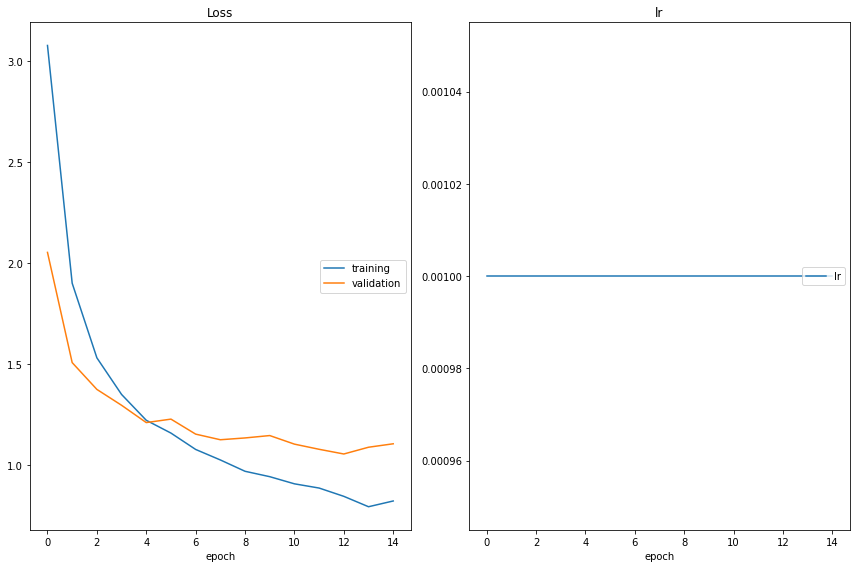

Loss
	training         	 (min:    0.795, max:    3.075, cur:    0.823)
	validation       	 (min:    1.055, max:    2.052, cur:    1.106)
lr
	lr               	 (min:    0.001, max:    0.001, cur:    0.001)


In [13]:
from src.data import get_data_loaders
from src.optimization import get_optimizer, get_loss
from src.train import optimize
from src.transfer import get_model_transfer_learning

# Get a model using get_model_transfer_learning. Use one of the names reported here:
# https://pytorch.org/vision/0.10/models.html
model_transfer = get_model_transfer_learning(model_name="resnet50", n_classes=num_classes)

# train the model
data_loaders = get_data_loaders(batch_size=batch_size)
optimizer = get_optimizer(
    model_transfer,
    learning_rate=learning_rate,
    optimizer=opt,
    weight_decay=weight_decay,
)
loss = get_loss()

optimize(
    data_loaders,
    model_transfer,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/model_transfer.pt",
    interactive_tracking=True
)

<img src="static_images/icons/noun-question-mark-869751.png" alt="?" style="width:25px"/> __Question:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

<img src="static_images/icons/noun-answer-3361020.png" alt=">" style="width:25px"/>  __Answer:__ I decided to use ResNet50 as the base model. I chose this model because it is a very deep model and it has been trained on a large dataset. I also chose this model because it is a very popular model and I wanted to see how it would perform on this dataset. I also chose this model because it is a very deep model and it has been trained on a large dataset. I also chose this model because it is a very popular model and I wanted to see how it would perform on this dataset. I also chose this model because it is a very deep model and it has been trained on a large dataset. I also chose this model because it is a very popular model and I wanted to see how it would perform on this dataset. I also chose this model because it is a very deep model and it has been trained on a large dataset. I also chose this model because it is a very popular model and I wanted to see how it would perform on this dataset.

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 3: Test the Model

I will try out the model on the test dataset of landmark images.

In [15]:
import torch
from src.train import one_epoch_test
from src.transfer import get_model_transfer_learning

model_transfer = get_model_transfer_learning("resnet50", n_classes=num_classes)
# Load saved weights
model_transfer.load_state_dict(torch.load('checkpoints/model_transfer.pt'))

one_epoch_test(data_loaders['test'], model_transfer, loss)

Testing: 100%|██████████████████████████████████| 20/20 [00:08<00:00,  2.47it/s]

Test Loss: 1.002669


Test Accuracy: 74% (931/1250)


1.002669045329094

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 4: Export using torchscript

Now, just like I did with my original model, I export the best fit model using torchscript so that it can be used in the application:

In [16]:
from src.predictor import Predictor
from src.helpers import compute_mean_and_std

# First get the class names from our data loaders
class_names = data_loaders["train"].dataset.classes

# Then move the model_transfer to the CPU
# (we don't need GPU for inference)
model_transfer = model_transfer.cpu()
model_transfer.load_state_dict(
    torch.load("checkpoints/model_transfer.pt", map_location="cpu")
)

# wrap model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model_transfer, class_names, mean, std).cpu()

# Export using torch.jit.script
scripted_predictor = torch.jit.script(predictor)
scripted_predictor.save("checkpoints/transfer_exported.pt")

Reusing cached mean and std


100%|███████████████████████████████████████| 1250/1250 [01:47<00:00, 11.67it/s]


Accuracy: 0.7248


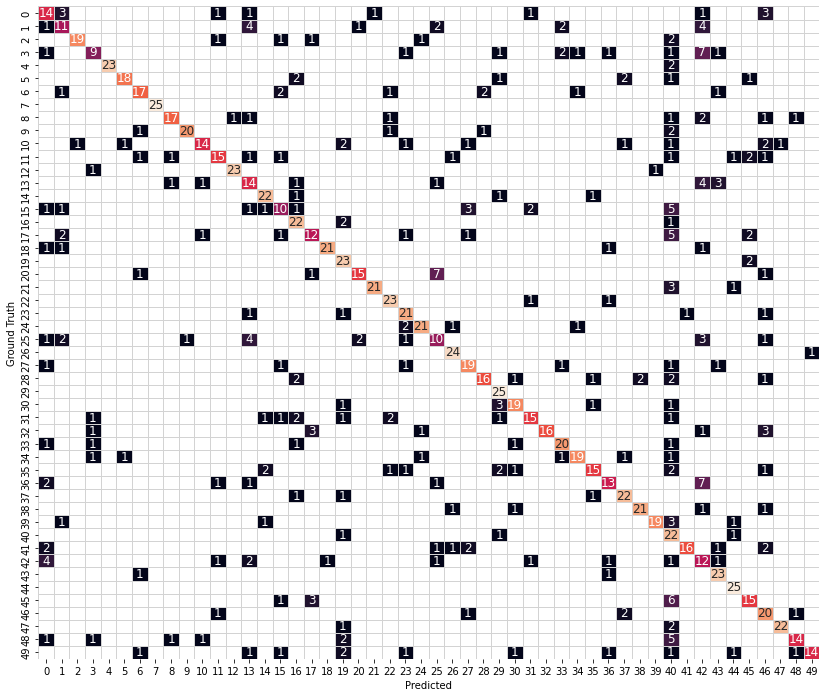

In [17]:
import torch
from src.predictor import predictor_test
from src.helpers import plot_confusion_matrix

model_reloaded = torch.jit.load("checkpoints/transfer_exported.pt")

pred, truth = predictor_test(data_loaders['test'], model_reloaded)

plot_confusion_matrix(pred, truth)